In [2]:
!pip install plotly
!pip install geopandas



   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.2 MB 541.6 kB/s eta 0:00:29
   - -------------------------------------- 0.5/16.2 MB 541.6 kB/s eta 0:00:29
   - -------------------------------------- 0.5/16.2 MB 541.6 kB/s eta 0:00:29
   - -------------------------------------- 0.8/16.2 MB 430.4 kB/s eta 0:00:36
   - -------------------------------------- 0.8/16.2 MB 430.4 kB/s eta 0:00:36
   - -------------------------------------- 0.8/16.2 MB 430.4 kB/s eta 0:00:36
   -- ------------------------------------- 1.0/16.2 MB 426.7 kB/s eta 0:00:36
   -- ------------------------------------- 1.0/16.2 MB 426.7 kB/s eta 0:00:36
   -- ------------------------------------- 1.0/16.2 MB 426.7 kB/s eta 0:00:36
   --- --

In [3]:
import numpy as np    # Importing NumPy for numerical operations
import pandas as pd   # Importing pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing Matplotlib for data visualization
import seaborn as sns  # Importing Seaborn for enhanced data visualizations


In [4]:
df = pd.read_csv("cleaned_property_data.csv")  # Loading the cleaned Dubai property dataset into a DataFrame
df.head()


,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


In [5]:
# Displaying information about the dataset, including column names, data types, and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1905 non-null   int64  
 1   neighborhood         1905 non-null   object 
 2   latitude             1905 non-null   float64
 3   longitude            1905 non-null   float64
 4   price                1905 non-null   int64  
 5   size_in_sqft         1905 non-null   int64  
 6   price_per_sqft       1905 non-null   float64
 7   no_of_bedrooms       1905 non-null   int64  
 8   no_of_bathrooms      1905 non-null   int64  
 9   quality              1905 non-null   object 
 10  amenities            1615 non-null   object 
 11  maid_room            1905 non-null   bool   
 12  unfurnished          1905 non-null   bool   
 13  balcony              1905 non-null   bool   
 14  barbecue_area        1905 non-null   bool   
 15  built_in_wardrobes   1905 non-null   b

In [6]:
# Calculating and displaying the number of missing values in each column of the dataset
df.isnull().sum() 

id                       0
neighborhood             0
latitude                 0
longitude                0
price                    0
size_in_sqft             0
price_per_sqft           0
no_of_bedrooms           0
no_of_bathrooms          0
quality                  0
amenities              290
maid_room                0
unfurnished              0
balcony                  0
barbecue_area            0
built_in_wardrobes       0
central_ac               0
childrens_play_area      0
childrens_pool           0
concierge                0
covered_parking          0
kitchen_appliances       0
lobby_in_building        0
maid_service             0
networked                0
pets_allowed             0
private_garden           0
private_gym              0
private_jacuzzi          0
private_pool             0
security                 0
shared_gym               0
shared_pool              0
shared_spa               0
study                    0
vastu_compliant          0
view_of_landmark         0
v

In [7]:
# Calculating and displaying the number of missing values in each column (same as isnull)
df.isna().sum() 

id                       0
neighborhood             0
latitude                 0
longitude                0
price                    0
size_in_sqft             0
price_per_sqft           0
no_of_bedrooms           0
no_of_bathrooms          0
quality                  0
amenities              290
maid_room                0
unfurnished              0
balcony                  0
barbecue_area            0
built_in_wardrobes       0
central_ac               0
childrens_play_area      0
childrens_pool           0
concierge                0
covered_parking          0
kitchen_appliances       0
lobby_in_building        0
maid_service             0
networked                0
pets_allowed             0
private_garden           0
private_gym              0
private_jacuzzi          0
private_pool             0
security                 0
shared_gym               0
shared_pool              0
shared_spa               0
study                    0
vastu_compliant          0
view_of_landmark         0
v

In [8]:
# Checking for and displaying the total number of duplicate rows in the dataset
df.duplicated().sum()

np.int64(0)

In [9]:
# Generating descriptive statistics for the numerical columns in the dataset
df.describe()

,id,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms
count,1.905000e+03,1905.000000,1905.000000,1.905000e+03,1905.000000,1905.000000,1905.000000,1905.000000
mean,7.573308e+06,25.116538,55.212338,2.085830e+06,1417.050394,1327.243785,1.793176,2.512861
std,1.925252e+05,0.062647,0.068794,2.913200e+06,891.487639,668.473559,0.949489,1.063117
min,5.528049e+06,24.865992,55.069311,2.200000e+05,294.000000,361.870000,0.000000,1.000000
25%,7.560167e+06,25.072791,55.145389,8.900000e+05,840.000000,870.920000,1.000000,2.000000
50%,7.631829e+06,25.096700,55.207506,1.400000e+06,1271.000000,1169.590000,2.000000,2.000000
75%,7.670328e+06,25.188130,55.271797,2.200000e+06,1703.000000,1622.500000,2.000000,3.000000
max,7.706643e+06,25.273623,55.441623,3.500000e+07,9576.000000,4805.870000,5.000000,6.000000


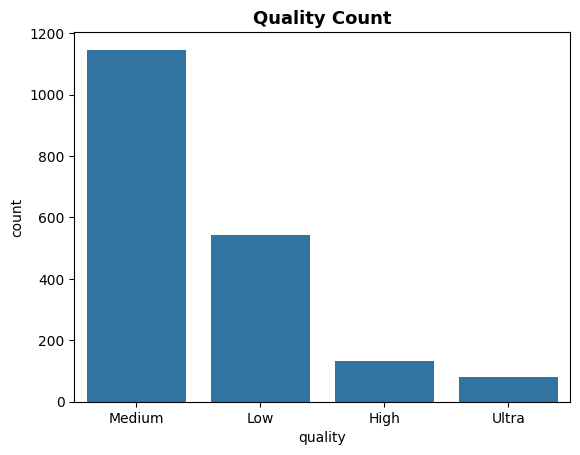

In [10]:
# Creating a count plot to visualize the distribution of the 'quality' variable in the dataset
sns.countplot(x='quality', data=df)  # Plotting the count of each quality category
plt.title("Quality Count", fontsize=13, fontweight="bold")  # Setting the title of the plot with specific font size and weight
plt.show()  # Displaying the plot

C:\Users\INDIA\AppData\Local\Temp\ipykernel_12348\2978216862.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




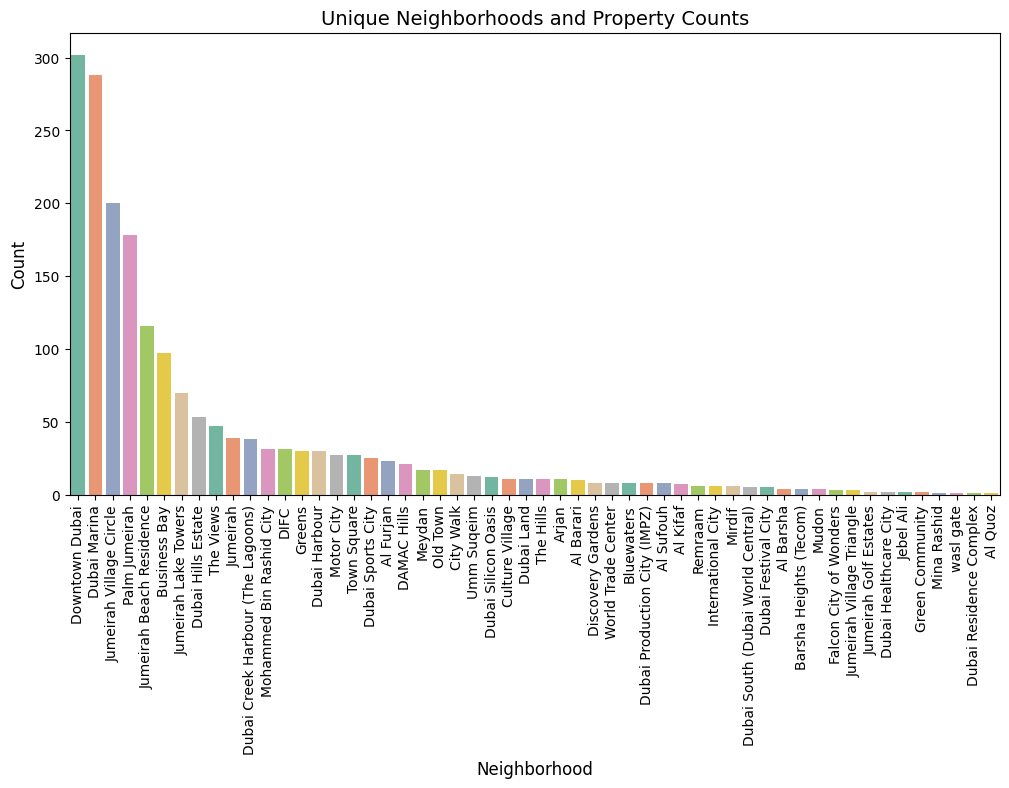

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique neighborhood counts
neighborhood_counts = df['neighborhood'].value_counts().reset_index()
neighborhood_counts.columns = ['neighborhood', 'count']

# Create a bar plot with unique neighborhood counts
plt.figure(figsize=(12, 6))
sns.barplot(data=neighborhood_counts, x='neighborhood', y='count', palette='Set2')

# Set plot title and labels
plt.title('Unique Neighborhoods and Property Counts', fontsize=14)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


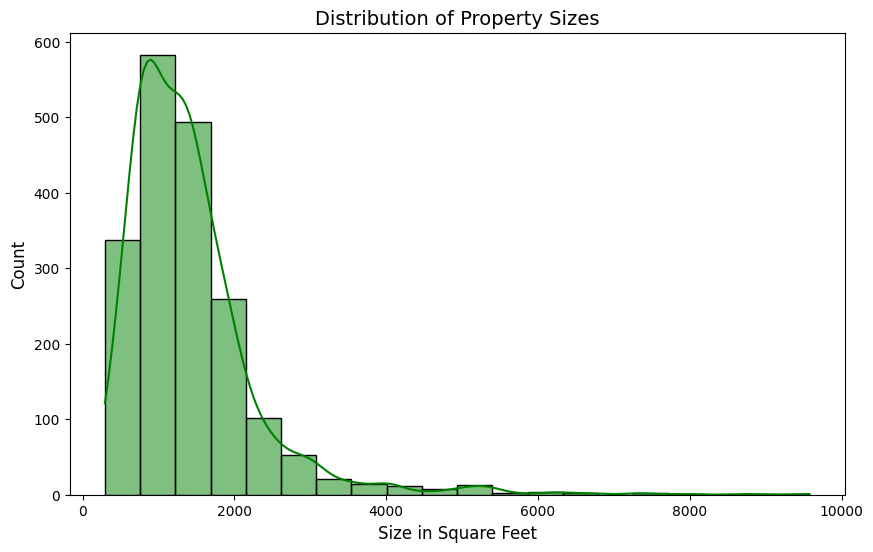

In [32]:
### Distribution of Property Sizes
plt.figure(figsize=(10, 6))
sns.histplot(df['size_in_sqft'], bins=20, color='green', kde=True)

# Set plot title and labels
plt.title('Distribution of Property Sizes', fontsize=14)
plt.xlabel('Size in Square Feet', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()


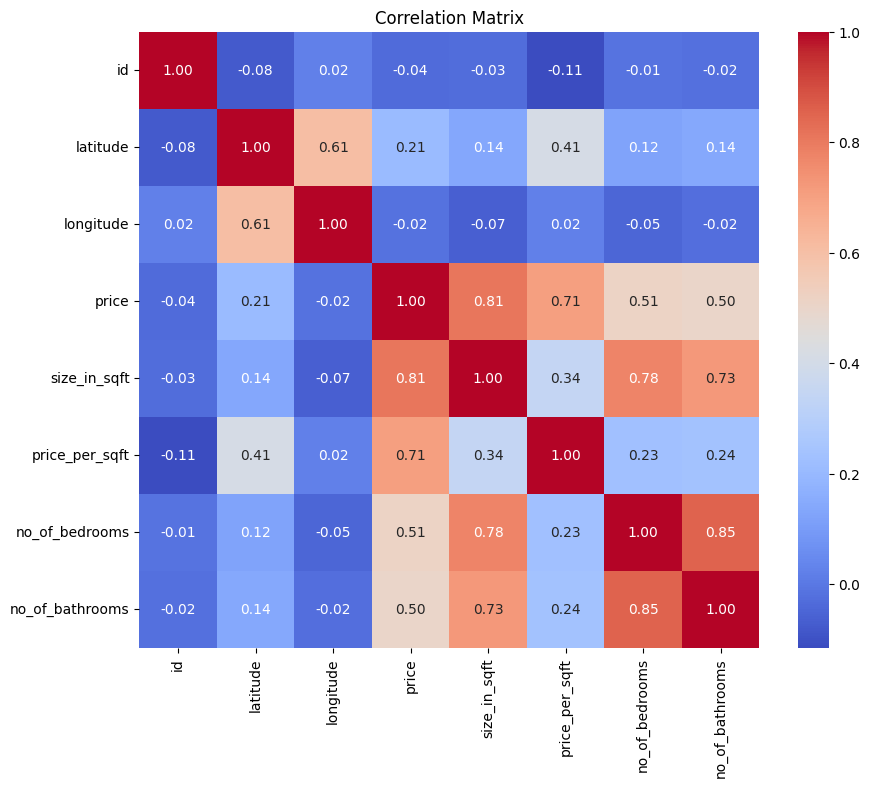

In [11]:
df_numeric =df.select_dtypes(include=["number"])
correlation = df_numeric.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot = True,fmt = ".2f",cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [13]:
# Retrieving and displaying the unique values present in the 'quality' column of the dataset
df['quality'].unique() 

array(['Medium', 'Low', 'High', 'Ultra'], dtype=object)

In [14]:
# Define the ordinal mapping dictionary
ordinal_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2,
    'Ultra': 3
}

# Apply ordinal encoding to the 'quality' column
df['quality'] = df['quality'].map(ordinal_mapping)


In [15]:
df.head(2)

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,1,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,1,...,False,False,True,True,False,False,False,False,True,False


In [16]:
# converting boolean column to 0/1
boolean_columns = ['maid_room', 'unfurnished', 'balcony', 'barbecue_area', 'built_in_wardrobes', 
                   'central_ac', 'childrens_play_area', 'childrens_pool', 'concierge', 
                   'covered_parking', 'kitchen_appliances', 'lobby_in_building', 'maid_service', 
                   'networked', 'pets_allowed', 'private_garden', 'private_gym', 'private_jacuzzi', 
                   'private_pool', 'security', 'shared_gym', 'shared_pool', 'shared_spa', 
                   'study', 'vastu_compliant', 'view_of_landmark', 'view_of_water', 'walk_in_closet']

df[boolean_columns] = df[boolean_columns].astype(int)


In [17]:
df.head(2)

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,1,...,0,0,1,0,0,0,0,0,1,0
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,1,...,0,0,1,1,0,0,0,0,1,0


In [18]:
# Again checking and Displaying information about the dataset, including column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1905 non-null   int64  
 1   neighborhood         1905 non-null   object 
 2   latitude             1905 non-null   float64
 3   longitude            1905 non-null   float64
 4   price                1905 non-null   int64  
 5   size_in_sqft         1905 non-null   int64  
 6   price_per_sqft       1905 non-null   float64
 7   no_of_bedrooms       1905 non-null   int64  
 8   no_of_bathrooms      1905 non-null   int64  
 9   quality              1905 non-null   int64  
 10  amenities            1615 non-null   object 
 11  maid_room            1905 non-null   int64  
 12  unfurnished          1905 non-null   int64  
 13  balcony              1905 non-null   int64  
 14  barbecue_area        1905 non-null   int64  
 15  built_in_wardrobes   1905 non-null   i

In [19]:
# Print all columns
df.columns

Index(['id', 'neighborhood', 'latitude', 'longitude', 'price', 'size_in_sqft',
       'price_per_sqft', 'no_of_bedrooms', 'no_of_bathrooms', 'quality',
       'amenities', 'maid_room', 'unfurnished', 'balcony', 'barbecue_area',
       'built_in_wardrobes', 'central_ac', 'childrens_play_area',
       'childrens_pool', 'concierge', 'covered_parking', 'kitchen_appliances',
       'lobby_in_building', 'maid_service', 'networked', 'pets_allowed',
       'private_garden', 'private_gym', 'private_jacuzzi', 'private_pool',
       'security', 'shared_gym', 'shared_pool', 'shared_spa', 'study',
       'vastu_compliant', 'view_of_landmark', 'view_of_water',
       'walk_in_closet'],
      dtype='object')

In [20]:
# Dropping unnecessary columns from the DataFrame to simplify the dataset
df.drop(columns=['maid_room', 'unfurnished', 'balcony', 'barbecue_area', 'built_in_wardrobes', 
                 'central_ac', 'childrens_play_area', 'childrens_pool', 'concierge', 
                 'covered_parking', 'view_of_water', 'walk_in_closet', 'private_gym', 
                 'private_jacuzzi', 'private_pool', 'security', 'shared_gym', 
                 'shared_pool', 'shared_spa', 'study', 'vastu_compliant', 
                 'view_of_landmark', 'kitchen_appliances', 'lobby_in_building', 
                 'maid_service', 'networked', 'pets_allowed', 'private_garden', 
                 'price_per_sqft', 'amenities'], inplace=True)  # Removing specified columns from the DataFrame


In [20]:
df.head(2)

,id,neighborhood,latitude,longitude,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,1,2,1
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,2,2,1


In [21]:
# Importing train_test_split to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Creating feature set by dropping the target variable 'price' from the DataFrame
X = df.drop(columns=['price']) 

# Defining the target variable for the prediction
y = df['price']


In [22]:
# spliting data to train and test
X_train ,X_test, y_train ,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [23]:
X_train.shape

(1524, 8)

In [24]:
X_test.shape

(381, 8)

In [25]:
df.head(2)

,id,neighborhood,latitude,longitude,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,1,2,1
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,2,2,1


In [26]:
# Saving the modified DataFrame to a new CSV file for future use
df.to_csv("New_data.csv")  


In [27]:
# Importing necessary libraries for model building and evaluation
from sklearn.linear_model import Ridge  # Importing Ridge regression model
from sklearn.metrics import mean_absolute_error, r2_score  # Importing metrics for model evaluation
from sklearn.linear_model import LinearRegression, Lasso  # Importing Linear Regression and Lasso regression models
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Importing scalers and encoders for data preprocessing
from sklearn.compose import make_column_transformer  # Importing function to create a column transformer for preprocessing
from sklearn.pipeline import make_pipeline  # Importing function to create a pipeline for combining preprocessing and modeling


In [28]:
# Applay Linear Regression
column_trans = make_column_transformer((OneHotEncoder(sparse_output = False),['neighborhood']),
                                        remainder = "passthrough")


In [29]:
# Initializing the StandardScaler to standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()


In [30]:
# Initializing the Linear Regression model for predicting house prices
lr = LinearRegression()


In [31]:
# Creating a pipeline that combines preprocessing (column transformations), scaling, and the Linear Regression model
pipe_lr = make_pipeline(column_trans, scaler, lr)


In [32]:
# Fitting the pipeline to the training data to train the Linear Regression model
pipe_lr.fit(X_train, y_train)


C:\Users\INDIA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['neighborhood'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [33]:
# Making predictions on the test set using the trained Linear Regression model
Model_lr = pipe_lr.predict(X_test)


In [34]:
# Calculating and displaying the R-squared score to evaluate the performance of the Linear Regression model
r2_score(Model_lr, y_test)

0.7202972278237827

In [35]:
# Applying Lasso
lasso = Lasso()

In [36]:
# Creating a pipeline that combines preprocessing (column transformations), scaling, and the Lasso regression model
pipe_ls = make_pipeline(column_trans, scaler, lasso)


In [37]:
# Fitting the pipeline to the training data to train the Lasso regression model
pipe_ls.fit(X_train, y_train)

C:\Users\INDIA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.092e+15, tolerance: 1.306e+12
  model = cd_fast.enet_coordinate_descent(
C:\Users\INDIA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
T

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['neighborhood'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [38]:
# Making predictions on the test set using the trained Lasso regression model
Model_ls = pipe_ls.predict(X_test)

# Calculating and displaying the R-squared score to evaluate the performance of the Lasso regression model
r2_score(Model_ls, y_test)


0.7202474567769539

In [39]:
# apply Ridge
# Initializing the Ridge regression model for predicting house prices
ridge = Ridge() 

# Creating a pipeline that combines preprocessing (column transformations), scaling, and the Ridge regression model
pipe_rd = make_pipeline(column_trans, scaler, ridge) 

# Fitting the pipeline to the training data to train the Ridge regression model
pipe_rd.fit(X_train, y_train) 
# Making predictions on the test set using the trained Ridge regression model
Model_rd = pipe_rd.predict(X_test)  

# Calculating and displaying the R-squared score to evaluate the performance of the Ridge regression model
r2_score(Model_rd, y_test)


0.7207551346598797

In [40]:
# Importing the pickle library for serializing and deserializing Python objects
import pickle


In [41]:
#Dumping model
pickle.dump(pipe_rd,open("RidgeModel.pkl",'wb'))

In [42]:
#Dumping model
pickle.dump(pipe_ls,open("Lasso.pkl",'wb'))

In [43]:
#Dumping model
pickle.dump(pipe_lr,open("LinearRegression.pkl",'wb'))

## Conclusion

In this house price analysis of Dubai properties, we utilized Linear Regression due to its strong predictive performance. After cleaning the dataset and dropping unnecessary columns, we built a pipeline for efficient preprocessing. The model achieved satisfactory R-squared scores, demonstrating its effectiveness in predicting house prices. This approach provides a solid foundation for future enhancements and analyses.

